# Secret-key or symmetric cryptography

## 1 DES S-box $S_3$

The input to the DES S-box $S_3$ is $110111$. What’s the output? Use Wikipedia, google, a book or some other source to find the table for $S_3$.

Source: http://celan.informatik.uni-oldenburg.de/kryptos/info/des/sbox/
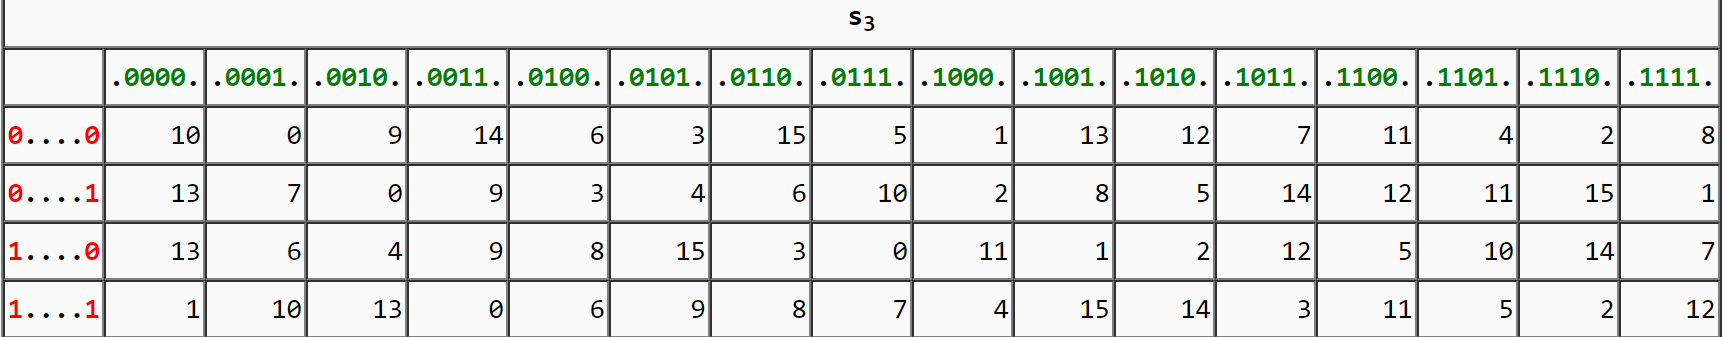

Output: 0011

## 2 3DES

What is the effective key size of 3DES and why is it not 168 bits?

## 3 Differences between AES and Rijndeal

What are the differences between the AES candidate Rijndeal and AES with respect to block size, key size and number of rounds?

As described in "[The Design of Rijandel](https://www.springer.com/us/book/9783540425809)": "The _only_ difference between Rijandel and the AES is the range of supported values for the block length and cipher key length".

Rijndael is a block cipher with both a variable block length and a variable key length. The block length and the key length can be independently specified to any multiple of 32 bits, with a minimum of 128 bits and a maximum of 256 bits. It would be possible to define versions of Rijndael with a higher block length or key length, but currently there seems no need for it.

The AES fixes the block length to 128 bits, and supports key lengths of 128, 192 or 256 bits only. The extra block and key lengths in Rijndael were not evaluated in the AES selection process, and consequently they are not adopted in the current FIPS standard.

##  4 AES S-box

If we input the byte $11011101$ into the AES S-box, what’s the output? Use the table in slides!

$1101 -> D -> row$

$1101 -> D -> column$

$11011101 -> C1 -> 11000001$

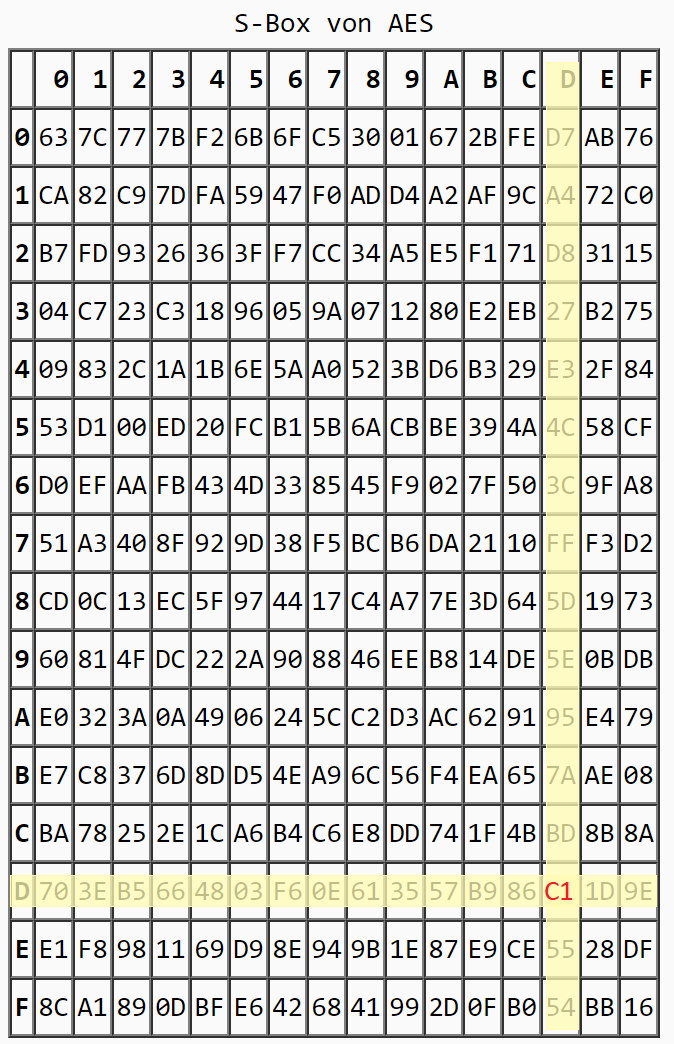

## 5 Other Block ciphers

Compare DES, 3DES and AES with other block ciphers like IDEA, Blowfish, Twofisch, RC5, RC6, Serpent and three more of Your choice. Make a table that shows key size, effective key size, block size, number of rounds, relative velocity of a hard- or software implementation.

## 6 Modes of operation

You should be able to produce sketches of the 5 modes of operation and You should be able to write down the equations, relating, IVs (if any), plaintext block, key, ciphertext block, encryption and decryption, XOR.
You should also understand the influence of a one-bit error in the ciphertext block.

| Modes of Operation | Long Name | Cipher Type |
|:--- |:--- |:--- |
| ECB | Electronic Code Book Mode | Block |
| CBC | Chained Block Cipher Mode | Block |
| CFB | Cipher FeedBack Mode | Stream |
| OFB | Output FeedBack  Mode| Stream |
| CTR | Counter Mode | Stream |

### ECB

![Electronic CodeBook Mode Diagram](img/ECB_Diagram.png)

#### Encryption
$c_k = E(k, m_k),\ k=1,2,3,...$

#### Decryption
$m_k = D(k, c_k),\ k=1,2,3,...$

#### Error Propagation
An error in the ciphertext produces garbage output but does not propagate.

### CBC

![Chained Block Cipher ModeDiagram](img/CBC_Diagram.png)

#### Encryption
$c_0 = IV$<br/>
$c_k = E(k,m_k\oplus c_{k-1}),\ k = 1,2,3,...$

#### Decryption
$c_0 = IV$<br/>
$m_k = D(k, c_k)\oplus c_{k-1},\ k = 1,2,3,...$

#### Error Propagation
An error in the ciphertext $c_k$ affects all bits of the corresponding plaintext $m_k$ and the one bit of $m_{k+1}$ with which the erroneous bit in $c_k$ is XOR-ed

### CFB

![Cipher FeedBack Mode Diagram](img/CFB_Diagram.png)

#### Encryption
$c_0 = IV$<br/>
$c_i = m_i \oplus E(k, c_{i-1},\ i=1,2,3...$

#### Decryption
$c_0 = IV$<br/>
$m_i = c_i \oplus E(k, c_{i-1},\ i=1,2,3...$

#### Error Propagation
An error in the cipher block $c_k$ produces one error in the plaintext block $m_k$ at the bit position where the error has occured (as it is XOR-ed), and produces garbage in the next plaintext block $m_{k+1}$ as $E(k,c_{k_{faulty}})$ should produce a completely different output than $E(k, c_k)$, and therefore $c_{k+1}\oplus E(k,c_{k_{faulty}})$ should be complete gibberish.

### OFB

![Output FeedBack Mode Diagram](img/OFB_Diagram.png)

#### Encryption
$z_0 = IV$<br/>
$z_i = E_k(z_{i-1}),\ i=1,2,3,...$<br/>
$c_i = m_i\oplus z_i,\ i=1,2,3,...$

#### Decryption
$z_0 = IV$<br/>
$z_i = E_k(z_{i-1}),\ i=1,2,3,...$<br/>
$m_i = c_i\oplus z_i,\ i=1,2,3,...$

#### Error Propagation
An error in cipher bit $c_i$ leads to an erroneous bit $m_i$ but does not propagate.

### CTR

![Counter Mode Diagram](img/CTR_Diagram.png)

#### Encryption
$z_0 = IV$<br/>
$z_i = IV\oplus i,\ i=1,2,3,...$<br/>
$y_i = x_i\oplus E_k(z_i),\ i=1,2,3,...$

#### Decryption
$z_0 = IV$<br/>
$z_i = IV\oplus i,\ i=1,2,3,...$<br/>
$y_i = x_i\oplus E_k(z_i),\ i=1,2,3,...$

#### Note on the IV
The IV should be a nonce, but same nonce can be used throughout the session. It's main goal is to offset the counter startpoint, so that using the same key and first message does not generate the same ciphertext (think of handshakes/authentication).

#### Error Propagation
An error in $y_0$ generates one error in the decrypted $x_0$, but does not propagate.

## 7 RC4

Use python in Jupyter Notebook to programm RC4. Do some research on RC4 and find out, why it should not be used any more!
Siehe auch [Webbrowser: Endgültig Schluss mit RC4](https://www.heise.de/security/meldung/Webbrowser-Endgueltig-Schluss-mit-RC4-2805770.html) und [Der Lange Abschied von RC4](https://www.golem.de/news/verschluesselung-der-lange-abschied-von-rc4-1507-114877.html).

In [12]:
def KSA(key):
    keylength = len(key)
    S = list(range(256))
    j = 0
    
    for i in range(256):
        j = (j + S[i] + key[i % keylength]) % 256
        S[i], S[j] = S[j], S[i]
    return S

def PRGA(S):
    i = 0
    j = 0
    
    while True:
        i = (i + 1) % 256
        j = (j + S[i]) % 256
        S[i], S[j] = S[j], S[i]
        yield S[(S[i] + S[j]) % 256]

def RC4(key):
    S = KSA(key)
    return PRGA(S)

def convert_key(s):
    return [ord(c) for c in s]

In [13]:
key = "Key"
plaintext = "Plaintext"
# ciphertext should be BBF316E8D940AF0AD3

key = convert_key(key)
keystream = RC4(key)

import sys

for c in plaintext:
    sys.stdout.write("%02X" % (ord(c) ^ next(keystream)))

BBF316E8D940AF0AD3

Vulnerabilities:

- Pseudo Random Number Generator PRNG has higher probabilities for some numbers to appear.<br/>
    This lets an attacker analyse some input/output-pairs and find out the key
- No nonce as input therefore it needs a new key for each stream.<br/>
    Since most applications just concatenate the nonce and the key, this is a problem because "over all possible RC4 keys, the statistics for the first few bytes of output keystream are strongly non-random, leaking information about the key."

## 8 Trivium

Use python in Jupyter Notebook to programm Trivium. This is not an easy task: do it in groups of two!

Use $0x00000000000000000000000000000000$ for the key, IV, and plaintext for initial testing.

The expected ciphertext for this should be $0xFBE0BF265859051B517A2E4E239FC97F$.

In the algorithm on slide “_Trivium — Initialization_”, the $+$ represents XOR (which in python is “^”), ·
represents logical AND (which in python is “&”). The key-stream is

$z_i = t_1 + t_2 + t_3$

and the $i$th byte of the ciphertext $c_i$ of the plaintext $m_i$ is

$c_i = z_i \oplus m_i$

The following [site](https://asecuritysite.com/encryption/trivium) might be of some help!

## 9 OTP

Make your own example with one-time pad. Why is it perfectly secure? Make sure, the key is truly random not used more than once and kept secret from adversaries.

$m = 0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100$<br />
$k = 0110110111011101100100110001101100000001010001110010110111101010101110010001101100011100$

In [18]:
m = '0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100'
k = '0110110111011101100100110001101100000001010001110010110111101010101110010001101100011100'

c = int(m,2)^int(k,2)

print('m: ' + m)
print('k: ' + k)
print('c: ' + bin(c)[2:].zfill(len(m)))
print('d: ' + bin(c^int(k,2))[2:].zfill(len(m)))
print('m: ' + m)

m: 0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
k: 0110110111011101100100110001101100000001010001110010110111101010101110010001101100011100
c: 0000010110111000111111110111011101101110011001110101101010000101110010110111011101111000
d: 0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
m: 0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
